In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\91990\\Downloads\\food_orders_new_delhi.csv")

###  The goal of Food Delivery Cost and Profitability Analysis is to identify areas where the service can reduce costs, increase revenue, and implement pricing or commission strategies that enhance profitability

In [3]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [4]:
df.shape

(1000, 12)

### Data Cleaning

In [5]:
df.isnull().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

In [6]:
df['Discounts and Offers'].fillna("0.0" , inplace = True)

In [7]:
df.isnull().sum()

Order ID                  0
Customer ID               0
Restaurant ID             0
Order Date and Time       0
Delivery Date and Time    0
Order Value               0
Delivery Fee              0
Payment Method            0
Discounts and Offers      0
Commission Fee            0
Payment Processing Fee    0
Refunds/Chargebacks       0
dtype: int64

In [8]:
df.describe()

,Order ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,1053.969000,28.620000,126.99000,29.832000,28.300000
std,288.819436,530.975339,16.958278,43.06405,11.627165,49.614228
min,1.000000,104.000000,0.000000,50.00000,10.000000,0.000000
25%,250.750000,597.750000,20.000000,90.00000,20.000000,0.000000
50%,500.500000,1038.500000,30.000000,127.00000,30.000000,0.000000
75%,750.250000,1494.000000,40.000000,164.00000,40.000000,50.000000
max,1000.000000,1995.000000,50.000000,200.00000,50.000000,150.000000


In [9]:
df['Discounts and Offers'].sample(15)

126    50 off Promo
232             0.0
640             10%
260    15% New User
699    50 off Promo
753    15% New User
17              10%
404       5% on App
731    50 off Promo
788             0.0
263             10%
77     15% New User
28     50 off Promo
472             10%
475    15% New User
Name: Discounts and Offers, dtype: object

In [10]:
df.dtypes

Order ID                   int64
Customer ID               object
Restaurant ID             object
Order Date and Time       object
Delivery Date and Time    object
Order Value                int64
Delivery Fee               int64
Payment Method            object
Discounts and Offers      object
Commission Fee             int64
Payment Processing Fee     int64
Refunds/Chargebacks        int64
dtype: object

In [11]:
def obtain_dis(x):
    if "%" in x:
        y = float(x.split('%')[0])
        return y
    if "off" in x:
        y = float(x.split(' ')[0])
        return y
    else:
        return 0.001
    


In [12]:
df['discount_pct'] = df['Discounts and Offers'].apply(lambda y : obtain_dis(y))

In [13]:
df['discount_pct'].sample(15)


473    10.000
607    15.000
166    50.000
916    15.000
254    10.000
286     0.001
448    50.000
454    10.000
103     0.001
877    10.000
798     0.001
27      5.000
239     5.000
223    15.000
298    10.000
Name: discount_pct, dtype: float64

In [14]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,discount_pct
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.000
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.000
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,15.000
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0.0,146,27,0,0.001
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.000


In [15]:
df['Order Date and Time'] = pd.to_datetime(df['Order Date and Time'])
df['Delivery Date and Time'] = pd.to_datetime(df['Delivery Date and Time'])

### Feature Engineering

In [16]:
df['discount_amt'] = df['Order Value']*(df['discount_pct']/100)
df['Total_cost'] = df['Delivery Fee'] + df['Payment Processing Fee'] + df['discount_amt']
df['profit'] = df['Commission Fee'] - df['Total_cost']

In [17]:
df[['Order Value','Commission Fee', 'discount_pct','Delivery Fee','Payment Processing Fee','Total_cost','profit']]

,Order Value,Commission Fee,discount_pct,Delivery Fee,Payment Processing Fee,Total_cost,profit
0,1914,150,5.000,0,47,142.70000,7.30000
1,986,198,10.000,40,23,161.60000,36.40000
2,937,195,15.000,30,45,215.55000,-20.55000
3,1463,146,0.001,50,27,77.01463,68.98537
4,1992,130,50.000,30,50,1076.00000,-946.00000
...,...,...,...,...,...,...,...
995,825,165,5.000,0,47,88.25000,76.75000
996,1627,110,0.001,50,42,92.01627,17.98373
997,553,64,0.001,20,31,51.00553,12.99447
998,1414,199,15.000,0,34,246.10000,-47.10000


In [18]:
print("Total Order Value        = " , df['Order Value'].sum())
print("Total Commission/Revenue = ",df['Commission Fee'].sum())
print("Total Cost               = ",round(df['Total_cost'].sum(),2))
print("Total Profit             = ",round(df['profit'].sum(),2))

Total Order Value        =  1053969
Total Commission/Revenue =  126990
Total Cost               =  232711.79
Total Profit             =  -105721.79


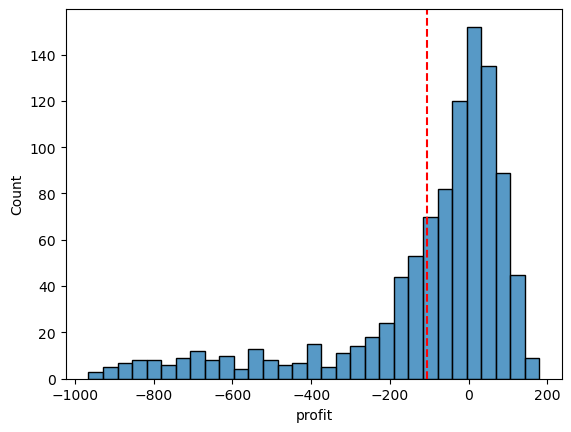

In [19]:
sn.histplot(x = df['profit'] )
plt.axvline(df['profit'].mean() , color = "red" , linestyle = "dashed")

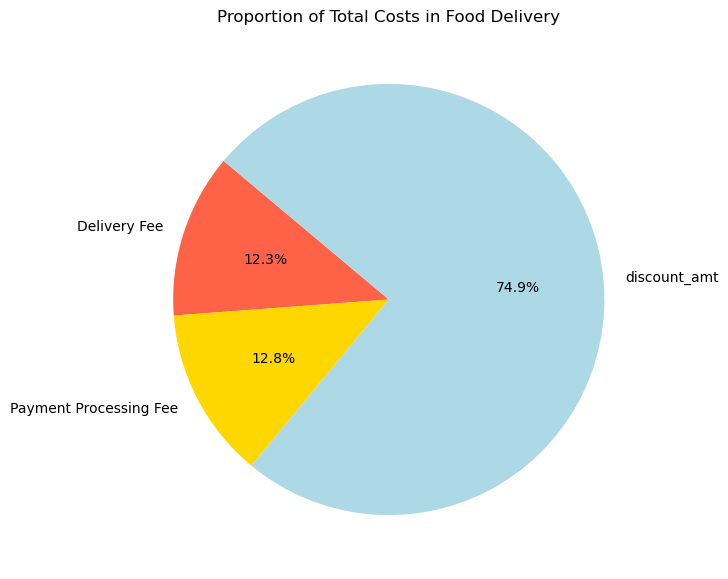

In [20]:
ttl_cost = df[['Delivery Fee', 'Payment Processing Fee', 'discount_amt']].sum()
plt.figure(figsize=(7, 7))
plt.pie(ttl_cost, labels=ttl_cost.index, autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold', 'lightblue'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

###  The loss to company is due to more discounts and less commission percentage 

<BarContainer object of 3 artists>

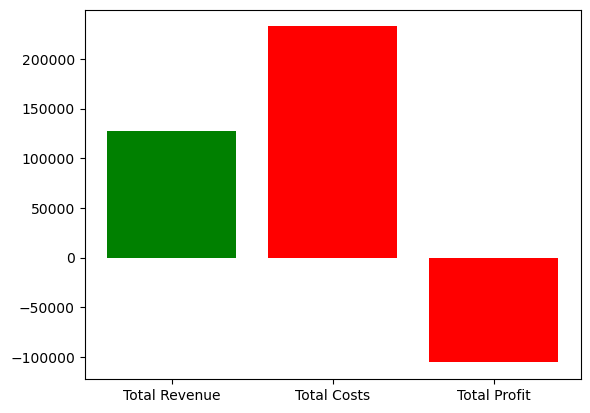

In [21]:
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [df['Commission Fee'].sum() , df['Total_cost'].sum() , df['profit'].sum()]
plt.bar(totals ,values, color = ['Green','red','red'])

In [22]:
profit_orders = df[df['profit']>0]
profit_orders.head(10)

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,discount_pct,discount_amt,Total_cost,profit
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.000,95.70000,142.70000,7.30000
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.000,98.60000,161.60000,36.40000
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0.0,146,27,0,0.001,0.01463,77.01463,68.98537
5,6,C7265,R2777,2024-01-25 04:36:52,2024-01-25 05:27:52,439,20,Cash on Delivery,10%,92,27,150,10.000,43.90000,90.90000,1.10000
6,7,C1466,R2457,2024-01-12 23:55:48,2024-01-13 00:48:48,303,30,Digital Wallet,5% on App,144,12,50,5.000,15.15000,57.15000,86.85000
7,8,C5426,R2978,2024-01-26 22:46:24,2024-01-27 00:36:24,260,0,Credit Card,10%,55,19,0,10.000,26.00000,45.00000,10.00000
9,10,C9322,R2161,2024-01-05 00:50:19,2024-01-05 02:10:19,491,40,Digital Wallet,10%,189,10,0,10.000,49.10000,99.10000,89.90000
10,11,C2685,R2379,2024-01-01 17:02:47,2024-01-01 18:21:47,868,0,Cash on Delivery,5% on App,149,36,0,5.000,43.40000,79.40000,69.60000
12,13,C7949,R2086,2024-01-05 16:43:24,2024-01-05 18:08:24,674,0,Cash on Delivery,0.0,115,20,0,0.001,0.00674,20.00674,94.99326
14,15,C6311,R2475,2024-02-03 00:49:50,2024-02-03 02:00:50,1193,0,Credit Card,0.0,192,16,0,0.001,0.01193,16.01193,175.98807


### Finding  the  commision percentage and discount percentage of the products that brings profit

In [23]:
profit_orders['commission_pct'] = profit_orders['Commission Fee']/profit_orders['Order Value']*100
profit_orders['effctv_discount_pct'] = profit_orders['discount_amt']/profit_orders['Order Value']*100
profit_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,discount_pct,discount_amt,Total_cost,profit,commission_pct,effctv_discount_pct
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.000,95.70000,142.70000,7.30000,7.836991,5.000
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.000,98.60000,161.60000,36.40000,20.081136,10.000
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0.0,146,27,0,0.001,0.01463,77.01463,68.98537,9.979494,0.001
5,6,C7265,R2777,2024-01-25 04:36:52,2024-01-25 05:27:52,439,20,Cash on Delivery,10%,92,27,150,10.000,43.90000,90.90000,1.10000,20.956720,10.000
6,7,C1466,R2457,2024-01-12 23:55:48,2024-01-13 00:48:48,303,30,Digital Wallet,5% on App,144,12,50,5.000,15.15000,57.15000,86.85000,47.524752,5.000


In [24]:
avg_cmsn_pct = profit_orders['commission_pct'].mean()
avg_dcnt_pct = profit_orders['effctv_discount_pct'].mean()

print("Effective Commission Percentage  =  ",round(avg_cmsn_pct))
print("Effective Discount Percentage    =  ",round(avg_dcnt_pct))

Effective Commission Percentage  =   31
Effective Discount Percentage    =   6


### The best commission percentage and discount percentage to make profit is 31% and 6%

In [25]:
df['efctv_cmsn'] = round(df['Order Value']*(avg_cmsn_pct/100))
df['efctv_dis'] = round(df['Order Value']*(avg_dcnt_pct/100))
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,discount_pct,discount_amt,Total_cost,profit,efctv_cmsn,efctv_dis
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.000,95.70000,142.70000,7.30000,584.0,112.0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.000,98.60000,161.60000,36.40000,301.0,58.0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,15.000,140.55000,215.55000,-20.55000,286.0,55.0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0.0,146,27,0,0.001,0.01463,77.01463,68.98537,446.0,86.0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.000,996.00000,1076.00000,-946.00000,608.0,117.0


### Adding new commission percentage and discount percentage to the data to predict the outcome

In [26]:
df['total_new_cost'] = df['Delivery Fee'] + df['Payment Processing Fee'] + df['efctv_dis']
df['new_profit'] = df['efctv_cmsn'] - df['total_new_cost']
df.head()


,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,discount_pct,discount_amt,Total_cost,profit,efctv_cmsn,efctv_dis,total_new_cost,new_profit
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.000,95.70000,142.70000,7.30000,584.0,112.0,159.0,425.0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.000,98.60000,161.60000,36.40000,301.0,58.0,121.0,180.0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,15.000,140.55000,215.55000,-20.55000,286.0,55.0,130.0,156.0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0.0,146,27,0,0.001,0.01463,77.01463,68.98537,446.0,86.0,163.0,283.0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.000,996.00000,1076.00000,-946.00000,608.0,117.0,197.0,411.0


In [27]:
print("After applying 31% commission% and 6% discount%\n")
print("Total Order Value        = " , df['Order Value'].sum())
print("Total Commission/Revenue = ",round(df['efctv_cmsn'].sum()))
print("Total Cost               = ",round(df['total_new_cost'].sum()))
print("Total Profit             = ",round(df['new_profit'].sum(),2))

After applying 31% commission% and 6% discount%

Total Order Value        =  1053969
Total Commission/Revenue =  321558
Total Cost               =  120299
Total Profit             =  201259.0


### Therfore by setting 31% commission percentage and 6% discount percentage we can surely reduce over discount and make profit 

In [28]:
print(" Actual profit , commission values\n")
print("Total Order Value        = " , df['Order Value'].sum())
print("Total Commission/Revenue = ",df['Commission Fee'].sum())
print("Total Cost               = ",round(df['Total_cost'].sum(),2))
print("Total Profit             = ",round(df['profit'].sum(),2))

 Actual profit , commission values

Total Order Value        =  1053969
Total Commission/Revenue =  126990
Total Cost               =  232711.79
Total Profit             =  -105721.79


Actual Profitable and Loss Orders



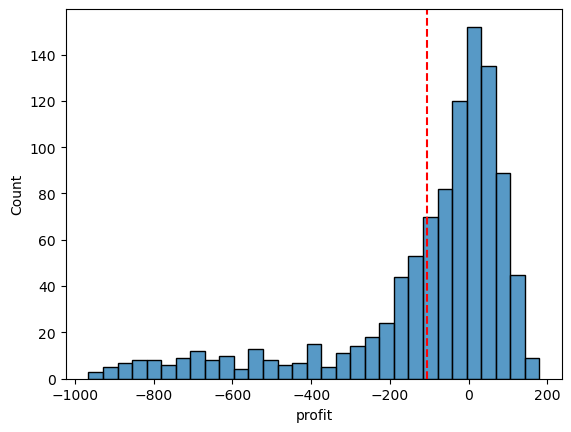

In [29]:
print("Actual Profitable and Loss Orders\n")
sn.histplot(x = df['profit'] )
plt.axvline(df['profit'].mean() , color = "red" , linestyle = "dashed")

After applying 31% commission and 6% discount



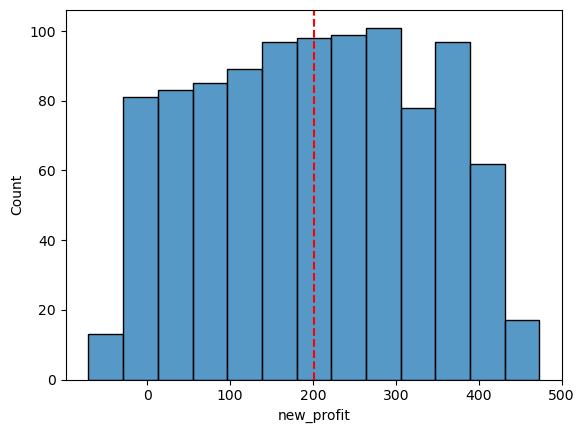

In [30]:
print("After applying 31% commission and 6% discount\n")
sn.histplot(x = df['new_profit'] )
plt.axvline(df['new_profit'].mean() , color = "red" , linestyle = "dashed")

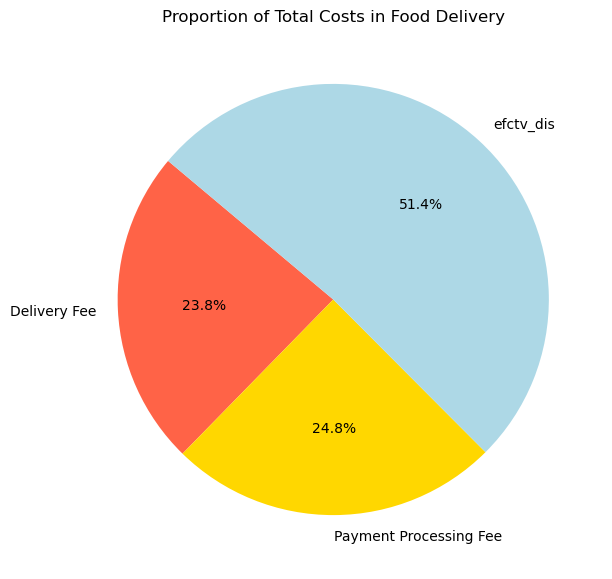

In [31]:
ttl_cost = df[['Delivery Fee', 'Payment Processing Fee', 'efctv_dis']].sum()
plt.figure(figsize=(7, 7))
plt.pie(ttl_cost, labels=ttl_cost.index, autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold', 'lightblue'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

Profit after applying 31% commission% and 6% discount



<BarContainer object of 3 artists>

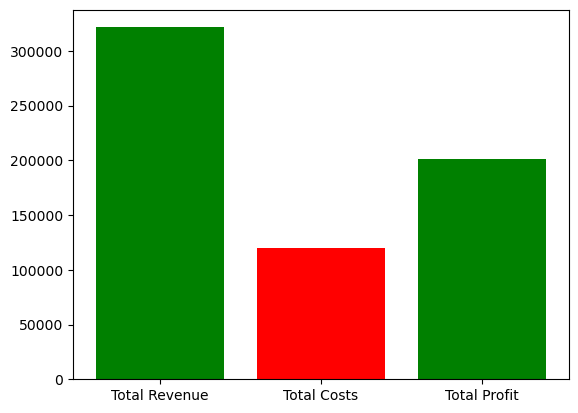

In [32]:
print("Profit after applying 31% commission% and 6% discount\n")
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [df['efctv_cmsn'].sum() , df['total_new_cost'].sum() , df['new_profit'].sum()]
plt.bar(totals ,values , color = ['green' , 'red' ,'green'])
